**DATA CLEANING**


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
symbols = ["AAPL","^GSPC","^DJI","^IXIC","^RUT","CL=F","^FTSE","GC=F","SI=F","^N225","JPY=X","GBPUSD=X","EURUSD=X"]
start_date = "2007-01-02"

features_close = {}

for symbol in symbols:
    features = yf.download(symbol, start=start_date)
    features_close[symbol] = features["Close"]

# Combine Close prices into single dataframe
df= pd.concat(features_close.values(), axis=1, keys=features_close.keys())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df.columns

Index(['AAPL', '^GSPC', '^DJI', '^IXIC', '^RUT', 'CL=F', '^FTSE', 'GC=F',
       'SI=F', '^N225', 'JPY=X', 'GBPUSD=X', 'EURUSD=X'],
      dtype='object')

In [ ]:
new_names = {"AAPL" : "apple.close" , "^GSPC" : "gscp.close", "^DJI" : "dji.close","^IXIC": "ixic.close","^RUT":"rut.close",
             "CL=F" : "clf.close", "^FTSE" : "ftse.close","GC=F" : "gfc.close","SI=F" : "sif.close","^N225" : "n225.close",
             "JPY=X" : "jpy.close","GBPUSD=X" : "gbpusd.close", "EURUSD=X" : "eurusd.close"}
df = df.rename(columns=new_names)

# Print the first few rows of the renamed dataframe
print(df.tail())

            apple.close   gscp.close     dji.close    ixic.close    rut.close  \
Date                                                                            
2023-05-04   165.789993  4061.219971  33127.738281  11966.400391  1718.810059   
2023-05-05   173.570007  4136.250000  33674.378906  12235.410156  1759.880005   
2023-05-08   173.500000  4138.120117  33618.691406  12256.919922  1754.469971   
2023-05-09   171.770004  4119.169922  33561.808594  12179.549805  1749.680054   
2023-05-10   172.559998  4110.689941  33322.640625  12222.585938  1751.111084   

            clf.close   ftse.close    gfc.close  sif.close    n225.close  \
Date                                                                       
2023-05-04  68.559998  7702.600098  2048.000000     26.035           NaN   
2023-05-05  71.339996  7778.399902  2017.400024     25.743           NaN   
2023-05-08  73.160004          NaN  2026.300049     25.636  28949.880859   
2023-05-09  73.709999  7764.100098  2036.199951     

In [ ]:
df.isna().sum()

apple.close     150
gscp.close      150
dji.close       150
ixic.close      150
rut.close       150
clf.close       148
ftse.close      138
gfc.close       150
sif.close       152
n225.close      271
jpy.close        27
gbpusd.close     15
eurusd.close     27
dtype: int64

In [ ]:
df = df.dropna(axis=0)
df.isna().sum()

apple.close     0
gscp.close      0
dji.close       0
ixic.close      0
rut.close       0
clf.close       0
ftse.close      0
gfc.close       0
sif.close       0
n225.close      0
jpy.close       0
gbpusd.close    0
eurusd.close    0
dtype: int64

In [ ]:
df.shape

(3764, 13)

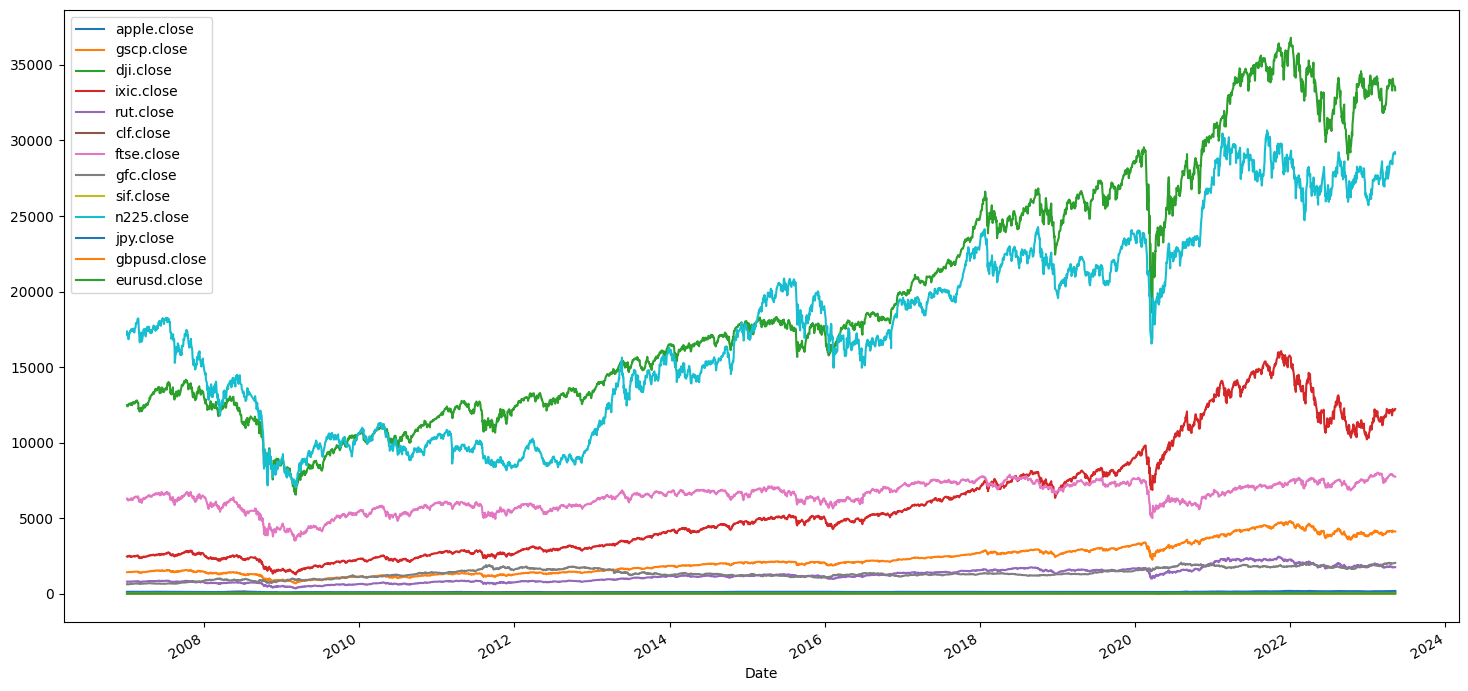

In [ ]:
df_plot = pd.DataFrame(df, index=df.index)
# Plot the DataFrame
df_plot.plot(figsize=(18,9))
plt.show()

Part - 1 **LSTM** **Model**

In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import yfinance as yf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
%matplotlib inline

2.12.0


In [ ]:
df_train = df
columns = list(df.columns)

#Creating date column
df_train.insert(0, 'Date', df_train.index)

# Extract dates (will be used in visualization)
datelist_train = list(df_train["Date"])
print('Training set shape == {}'.format(df_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(columns))
df_train.tail()

Training set shape == (3764, 14)
All timestamps == 3764
Featured selected: ['apple.close', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close', 'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close', 'jpy.close', 'gbpusd.close', 'eurusd.close']


,Date,apple.close,gscp.close,dji.close,ixic.close,rut.close,clf.close,ftse.close,gfc.close,sif.close,n225.close,jpy.close,gbpusd.close,eurusd.close
Date,,,,,,,,,,,,,,
2023-04-27,2023-04-27,168.410004,4135.350098,33826.160156,12142.240234,1751.219971,74.760002,7831.600098,1989.900024,24.983000,28457.679688,133.464996,1.247147,1.104728
2023-04-28,2023-04-28,169.679993,4169.479980,34098.160156,12226.580078,1768.989990,76.779999,7870.600098,1990.099976,24.999001,28856.439453,133.802002,1.249750,1.103205
2023-05-02,2023-05-02,168.539993,4119.580078,33684.531250,12080.509766,1732.109985,71.660004,7773.000000,2014.300049,25.403999,29157.949219,137.520996,1.248595,1.096924
2023-05-09,2023-05-09,171.770004,4119.169922,33561.808594,12179.549805,1749.680054,73.709999,7764.100098,2036.199951,25.698000,29242.820312,135.072998,1.261273,1.099614
2023-05-10,2023-05-10,172.559998,4110.689941,33322.640625,12222.585938,1751.111084,72.470001,7741.330078,2035.900024,25.660000,29122.179688,134.248001,1.262116,1.097454


In [ ]:
df_train = df_train[columns].astype(str)
for i in columns:
    for j in range(0, len(df_train)):
        df_train[i][j] = df_train[i][j].replace(',', '')

df_train = df_train.astype(float)

# Using multiple features (predictors)
training_set = df_train.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (3764, 13).


array([[3.05928612e+00, 1.41833997e+03, 1.24806904e+04, ...,
        1.18830002e+02, 1.94299257e+00, 1.30929470e+00],
       [3.03749990e+00, 1.40970996e+03, 1.23980098e+04, ...,
        1.18690002e+02, 1.93080008e+00, 1.29849887e+00],
       [3.30607104e+00, 1.41210999e+03, 1.24165996e+04, ...,
        1.19300003e+02, 1.93918705e+00, 1.29969716e+00],
       ...,
       [1.68539993e+02, 4.11958008e+03, 3.36845312e+04, ...,
        1.37520996e+02, 1.24859536e+00, 1.09692419e+00],
       [1.71770004e+02, 4.11916992e+03, 3.35618086e+04, ...,
        1.35072998e+02, 1.26127255e+00, 1.09961402e+00],
       [1.72559998e+02, 4.11068994e+03, 3.33226406e+04, ...,
        1.34248001e+02, 1.26211631e+00, 1.09745395e+00]])

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

MMsc = MinMaxScaler()
scaled_df_train = MMsc.fit_transform(training_set)

MMsc_predict = MinMaxScaler()
MMsc_predict.fit_transform(training_set[:, 0:1])

array([[0.00150604],
       [0.00138289],
       [0.00290104],
       ...,
       [0.93691604],
       [0.95517426],
       [0.95963985]])

In [ ]:
len(scaled_df_train)

3764

In [ ]:
# Creating a data structure with 90 timestamps and 1 output
X_train = []
y_train = []

n_future = 30   # Number of days we want to predict into the future
n_past = 60     # Number of past days we want to use to predict the future

for i in range(n_past, len(scaled_df_train) - n_future + 1 ):
    X_train.append(scaled_df_train[i - n_past:i, 0:df_train.shape[1] - 1])
    y_train.append(scaled_df_train[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (3675, 60, 12).
y_train shape == (3675, 1).


PART 2. Create a model Training

In [ ]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [ ]:
n_past

60

In [ ]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, df_train.shape[1]-1)))

# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.25))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 10)                3000      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 22,723
Trainable params: 22,723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=5, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train, y_train, shuffle=True, epochs=30, callbacks=[es, rlr, mcp, tb], validation_split=0.2, verbose=1, batch_size=256)


Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 0.0903
Epoch 1: val_loss improved from inf to 0.30291, saving model to weights.h5
12/12 [==============================] - 8s 281ms/step - loss: 0.0903 - val_loss: 0.3029 - lr: 0.0100
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.0049
Epoch 2: val_loss improved from 0.30291 to 0.23032, saving model to weights.h5
12/12 [==============================] - 3s 230ms/step - loss: 0.0049 - val_loss: 0.2303 - lr: 0.0100
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.0029
Epoch 3: val_loss improved from 0.23032 to 0.20997, saving model to weights.h5
12/12 [==============================] - 3s 255ms/step - loss: 0.0029 - val_loss: 0.2100 - lr: 0.0100
Epoch 4/30
12/12 [==============================] - ETA: 0s - loss: 0.0021
Epoch 4: val_loss improved from 0.20997 to 0.19324, saving model to weights.h5
12/12 [==============================] - 2s 199ms/step - loss: 0.0021 - val_loss: 

PART 3. Make future predictions

In [ ]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()
# Convert Pandas Timestamp to Datetime object (for transformation) --> FUTURE
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [ ]:
# Perform predictions
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

113/113 [==============================] - 2s 21ms/step


In [ ]:
# Inverse the predictions to original measurements

# ---> Special function: convert <datetime.date> to <Timestamp>
def datetime_to_timestamp(x):
    '''
        x : a given datetime value (datetime.date)
    '''
    return datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = MMsc_predict.inverse_transform(predictions_future)
y_pred_train = MMsc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Close']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)


In [ ]:
PREDICTIONS_FUTURE.tail()

,Close
2023-06-04,104.427147
2023-06-05,104.301811
2023-06-06,104.244026
2023-06-07,104.380310
2023-06-08,104.484093


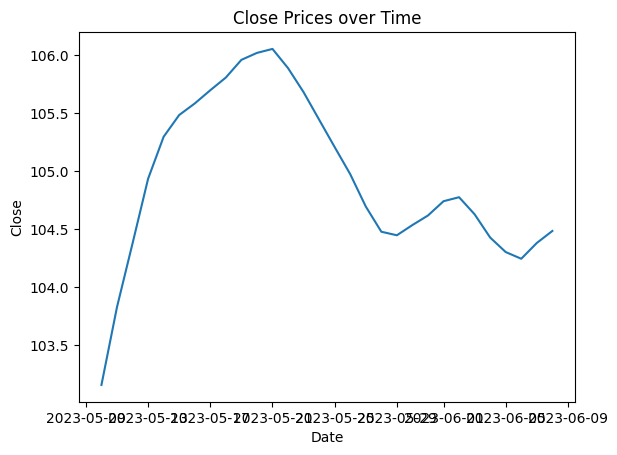

In [ ]:
start_date = pd.to_datetime('2023-04-01')
filtered_prediction_train = PREDICTIONS_FUTURE[PREDICTIONS_FUTURE.index >= start_date]
plt.plot(filtered_prediction_train.index, filtered_prediction_train['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Prices over Time')
plt.show()

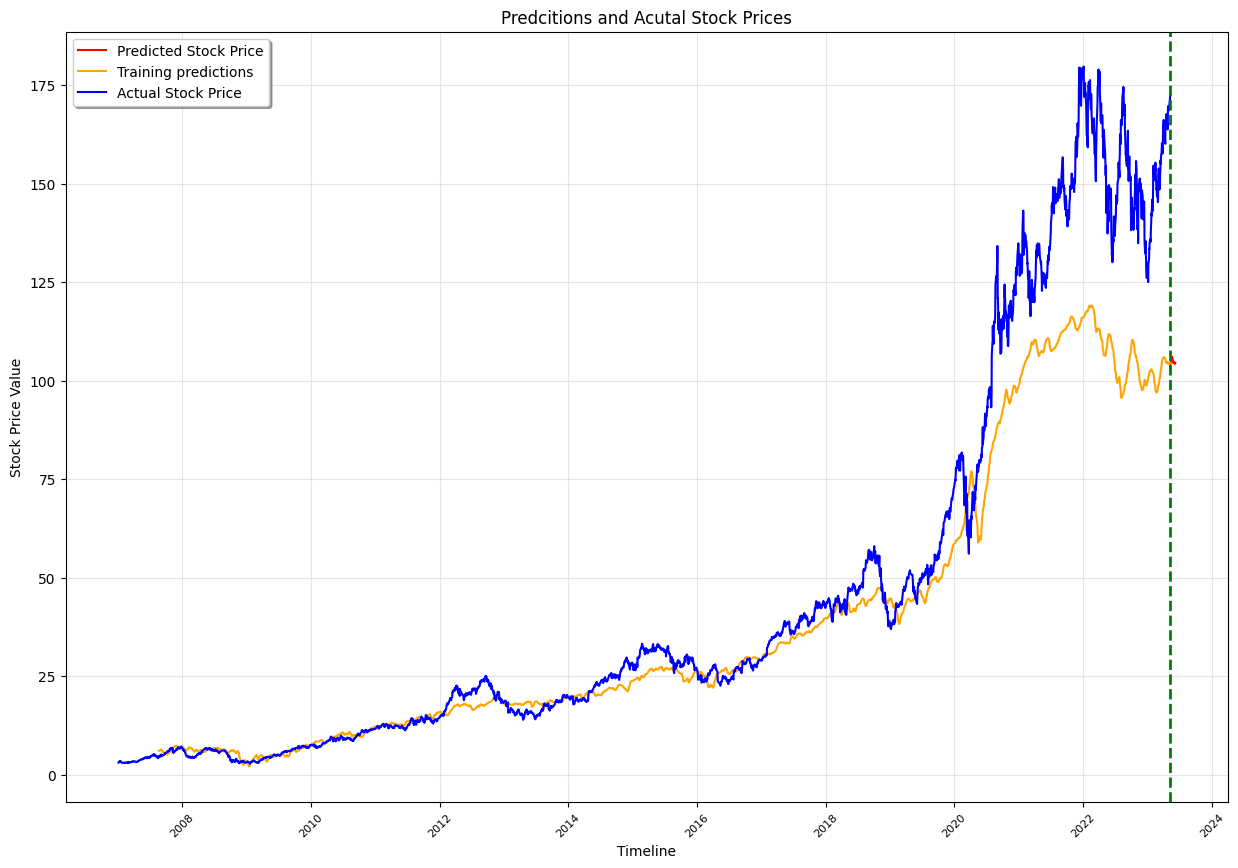

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Plot parameters
START_DATE_FOR_PLOTTING = '2007-01-04'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Close'], color='orange', label='Training predictions')
plt.plot(df_train.loc[START_DATE_FOR_PLOTTING:].index, df_train.loc[START_DATE_FOR_PLOTTING:]['apple.close'], color='b', label='Actual Stock Price')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Stock Price Value', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

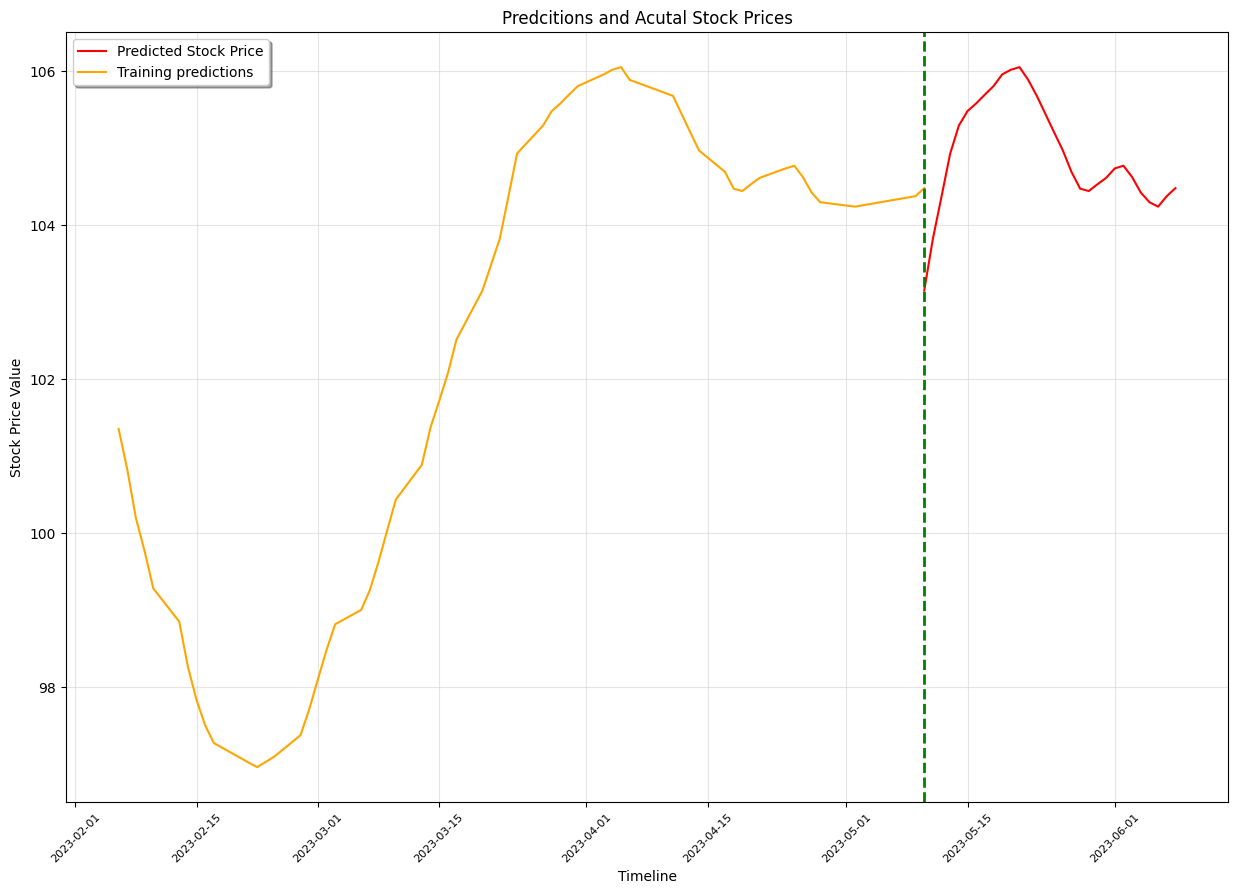

In [ ]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Plot parameters
START_DATE_FOR_PLOTTING = '2023-02-04'

plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:].index, PREDICTION_TRAIN.loc[START_DATE_FOR_PLOTTING:]['Close'], color='orange', label='Training predictions')
#plt.plot(df_train.loc[START_DATE_FOR_PLOTTING:].index, df_train.loc[START_DATE_FOR_PLOTTING:]['apple.close'], color='b', label='Actual Stock Price')


plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('Predcitions and Acutal Stock Prices', fontsize=12)
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Stock Price Value', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [ ]:
#Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 
from statistics import mean

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_true = df["apple.close"].tail(30)
y_pred = PREDICTIONS_FUTURE.tail(30)['Close'].values
# Compute the metrics
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print the metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 59.37450551549765
MAE: 59.230464935302734
MAPE: 36.039926661948755
